# Z-plane exploration 

Another adaptation from the suite2p notebooks that loads your data after running and curating suite2p resultse

I'm trying to identify methods to detect cells across z-plane. The final product may have to be some classification method that uses some set of features to distinguish cells existing in z-planes. Like for example, we could use the features from the Zong paper, build a logistic regression classifier with a ton of data, then let the classifier tell us which cells are overlapping

I have found multiple cases of cells existing in two planes and some existing in three. Typically, a cell exists in two planes.

Options:
- Max projection over zplane
    - Pros:
      1) Don't have to worry about z-drift so much, you are taking the max value per plane per time point
      2) Easy
      3) Memory efficient (nearly n/3 size on memory)
      4) 
    - Cons:
      1) What if a cell overlaps with another cell, one in plane0, the other in plane2, the max projection would merge these two cells, treating them as one. Is this even a real issue? There will be false positives using any method.
      2) You lose z plane information. Is this really an issue if z-plane scale is 75um in total?

If classification of a cell requires a signal:noise calculation, then overlapping cells should reveal slightly different activity profiles which would separate them?


In [1]:
from pathlib import Path
from tempfile import TemporaryDirectory
import matplotlib.pyplot as plt
import numpy as np
import os
import tifffile
import xmltodict
import suite2p
import cv2
from ipywidgets import IntSlider, VBox
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

Loading in the combined variable

In [2]:
# movies and associated frame rates
output_path = r"C:\Users\spell\Desktop\John\cleanLines1_img\suite2p\combined"
listed_data = os.listdir(output_path)

# loads in your data and automatically assigns their inputs
var_names =[]
for i in listed_data:
    if '.npy' in i:
        if 'ops' in i:
            globals()[i.split('.')[0]]=np.load(os.path.join(output_path,i),allow_pickle=True).item()
            pass
        else:
            globals()[i.split('.')[0]]=np.load(os.path.join(output_path,i),allow_pickle=True)
        var_names.append([i.split('.')[0]])
        
# prep stuff
output_op_file = np.load(Path(ops['save_path']).joinpath('ops.npy'), allow_pickle=True).item()
output_op_file.keys() == ops.keys()
stats_file = Path(ops['save_path']).joinpath('stat.npy')
iscell = np.load(Path(ops['save_path']).joinpath('iscell.npy'), allow_pickle=True)[:, 0].astype(bool)
stats = np.load(stats_file, allow_pickle=True)
stats.shape, iscell.shape  

# get image object
im = suite2p.ROI.stats_dicts_to_3d_array(stats, Ly=ops['Ly'], Lx=ops['Lx'], label_id=True)
im[im == 0] = np.nan
cell_roi = np.nanmax(im[iscell], axis=0)

C:\Users\spell\AppData\Local\Temp\ipykernel_16952\1859094980.py:27: RuntimeWarning: All-NaN slice encountered
  cell_roi = np.nanmax(im[iscell], axis=0)


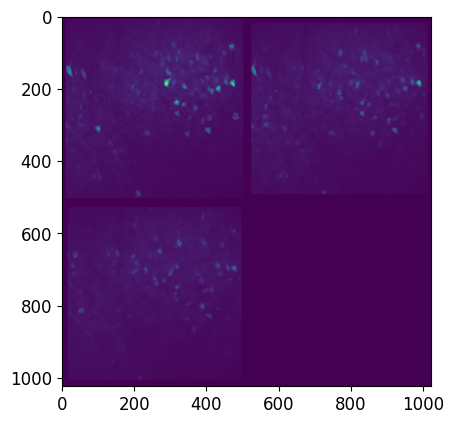

In [4]:
plt.imshow(output_op_file['max_proj'])

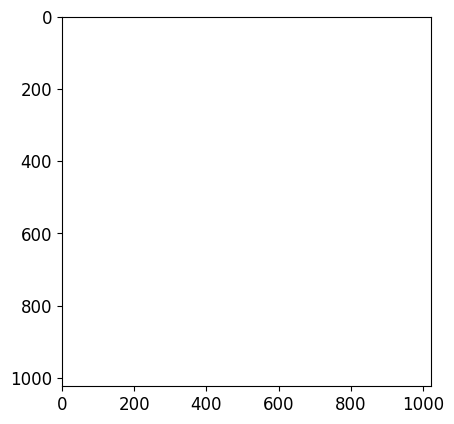

In [86]:
#fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
plt.imshow(im[iscell][120])

Loading in separate planes

C:\Users\spell\AppData\Local\Temp\ipykernel_16952\3920731788.py:30: RuntimeWarning: All-NaN slice encountered
  plane_mask.append(np.nanmax(im[i][iscell[i]], axis=0))


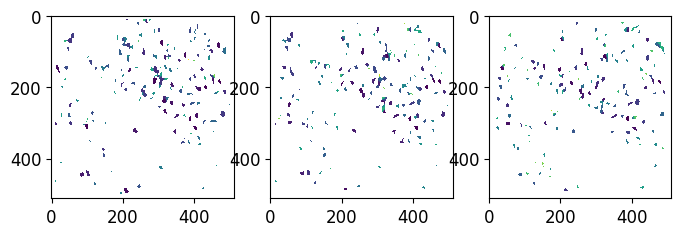

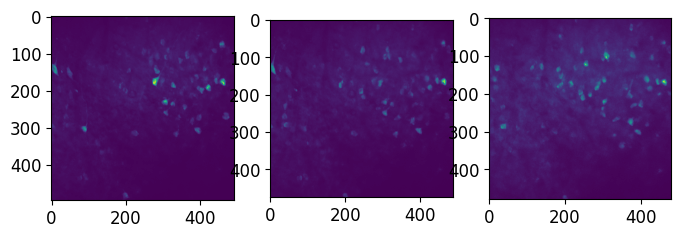

In [6]:
# define path
output_path = r"C:\Users\spell\Desktop\John\cleanLines1_img\suite2p"

#
# load data
plane_dirs = [os.path.join(output_path,i) for i in os.listdir(output_path) if 'plane' in i]

# get results
stats_file = []; iscell = []; f_cells = []; f_neuropils = []; spks = []; ops = []
for i in plane_dirs:
    temp_ops = np.load(os.path.join(i,'ops.npy'), allow_pickle=True).item()
    temp_ops.keys() == temp_ops.keys()  
    ops.append(temp_ops)
    stats_file.append(np.load(os.path.join(i,'stat.npy'),allow_pickle=True))
    iscell.append(np.load(os.path.join(i,'iscell.npy'),allow_pickle=True)[:, 0].astype(bool))
    f_cells.append(np.load(os.path.join(i,'F.npy'),allow_pickle=True))
    f_neuropils.append(np.load(os.path.join(i,'Fneu.npy'),allow_pickle=True))
    spks.append(np.load(os.path.join(i,'spks.npy'),allow_pickle=True))

# get image masks
im = []
for i in range(len(stats_file)):
    temp = suite2p.ROI.stats_dicts_to_3d_array(stats_file[i], Ly=ops[i]['Ly'], Lx=ops[i]['Lx'], label_id=True)
    temp[temp == 0] = np.nan
    im.append(temp)

# get single matrix per plane
plane_mask = []
for i in range(len(im)):
    plane_mask.append(np.nanmax(im[i][iscell[i]], axis=0))

#
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(8,8))
for i in range(len(plane_mask)):
    ax[i].imshow(plane_mask[i])

fig2, ax2 = plt.subplots(nrows=1,ncols=3,figsize=(8,8))
for i in range(len(plane_mask)):
    ax2[i].imshow(ops[i]['max_proj'])

#
from suite2p.detection import stats
#stats.filter_overlappers(ypixs, xpixs, overlap_image, max_overlap)

# x and y data from 1 cell
x = stats_file[0][iscell[0]][0]['xpix']
y = stats_file[0][iscell[0]][0]['ypix']
overlap = stats_file[0][iscell[0]][0]['overlap']

In [9]:
ops[i]['max_proj'].shape

(478, 482)

In [89]:
z_image = stats_file[0]
z_image

array([{'ypix': array([175, 175, 176, 176, 176, 176, 176, 177, 177, 177, 177, 177, 177,
              177, 177, 178, 178, 178, 178, 178, 178, 178, 178, 179, 179, 179,
              179, 179, 179, 179, 179, 179, 180, 180, 180, 180, 180, 180, 180,
              180, 180, 180, 180, 181, 181, 181, 181, 181, 181, 181, 181, 181,
              181, 181, 181, 181, 182, 182, 182, 182, 182, 182, 182, 182, 182,
              182, 182, 182, 182, 183, 183, 183, 183, 183, 183, 183, 183, 183,
              183, 183, 183, 183, 183, 184, 184, 184, 184, 184, 184, 184, 184,
              184, 184, 184, 184, 184, 184, 185, 185, 185, 185, 185, 185, 185,
              185, 185, 185, 185, 185, 185, 185, 186, 186, 186, 186, 186, 186,
              186, 186, 186, 186, 186, 186, 186, 186, 186, 187, 187, 187, 187,
              187, 187, 187, 187, 187, 187, 187, 187, 187, 187, 188, 188, 188,
              188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 189, 189, 189,
              189, 189, 189, 189, 189, 189,

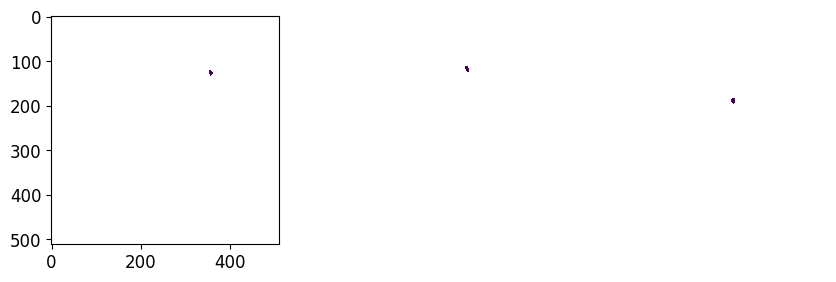

In [71]:
comp = 29
#plt.imsh3w(im[0][iscell[0]][comp]); #ax[0].set_axis_off()
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(10,10))
ax[0].imshow(im[0][iscell[0]][comp]); #ax[0].set_axis_off()
ax[1].imshow(im[1][iscell[1]][comp]); ax[1].set_axis_off()
ax[2].imshow(im[2][iscell[2]][comp]); ax[2].set_axis_off()

## Visualizations

### Registration

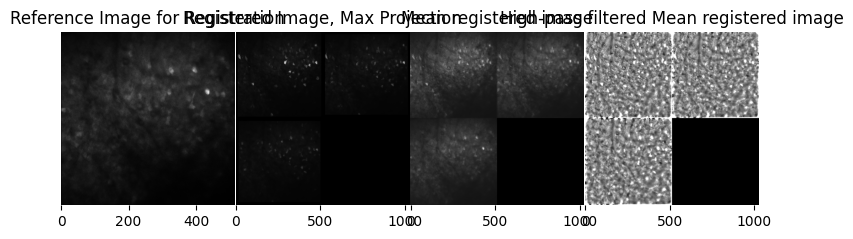

In [10]:
plt.subplot(1, 4, 1)
plt.imshow(ops['refImg'], cmap='gray', )
plt.title("Reference Image for Registration");

plt.subplot(1, 4, 2)
plt.imshow(ops['max_proj'], cmap='gray')
plt.title("Registered Image, Max Projection");

plt.subplot(1, 4, 3)
plt.imshow(ops['meanImg'], cmap='gray')
plt.title("Mean registered image")

plt.subplot(1, 4, 4)
plt.imshow(ops['meanImgE'], cmap='gray')
plt.title("High-pass filtered Mean registered image");

### Detection


In [11]:
stats_file = Path(ops['save_path']).joinpath('stat.npy')
iscell = np.load(Path(ops['save_path']).joinpath('iscell.npy'), allow_pickle=True)[:, 0].astype(bool)
stats = np.load(stats_file, allow_pickle=True)
stats.shape, iscell.shape

((842,), (842,))

C:\Users\spell\AppData\Local\Temp\ipykernel_4952\829472250.py:9: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmax(im, axis=0), cmap='jet')
C:\Users\spell\AppData\Local\Temp\ipykernel_4952\829472250.py:13: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmax(im[~iscell], axis=0, ), cmap='jet')
C:\Users\spell\AppData\Local\Temp\ipykernel_4952\829472250.py:17: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmax(im[iscell], axis=0), cmap='jet')


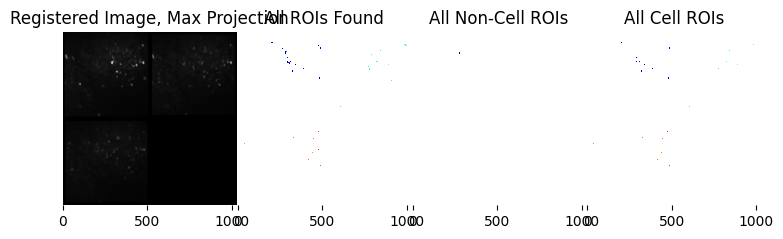

In [12]:
im = suite2p.ROI.stats_dicts_to_3d_array(stats, Ly=ops['Ly'], Lx=ops['Lx'], label_id=True)
im[im == 0] = np.nan

plt.subplot(1, 4, 1)
plt.imshow(ops['max_proj'], cmap='gray')
plt.title("Registered Image, Max Projection")

plt.subplot(1, 4, 2)
plt.imshow(np.nanmax(im, axis=0), cmap='jet')
plt.title("All ROIs Found")

plt.subplot(1, 4, 3)
plt.imshow(np.nanmax(im[~iscell], axis=0, ), cmap='jet')
plt.title("All Non-Cell ROIs")

plt.subplot(1, 4, 4)
plt.imshow(np.nanmax(im[iscell], axis=0), cmap='jet')
plt.title("All Cell ROIs");


The `cell_roi` variable is a matrix with different numerical values set for different components so that we can distinguish them. For the purposes of this visualization, set them to all be one value

C:\Users\spell\AppData\Local\Temp\ipykernel_4952\2819684976.py:1: RuntimeWarning: All-NaN slice encountered
  cell_roi = np.nanmax(im[iscell], axis=0)


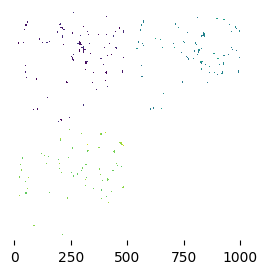

In [13]:
cell_roi = np.nanmax(im[iscell], axis=0)
plt.figure(figsize=(3,3))
plt.imshow(cell_roi)

## Extract Traces


In [14]:
f_cells = np.load(Path(ops['save_path']).joinpath('F.npy'))
f_neuropils = np.load(Path(ops['save_path']).joinpath('Fneu.npy'))
spks = np.load(Path(ops['save_path']).joinpath('spks.npy'))
f_cells.shape, f_neuropils.shape, spks.shape

((842, 11063), (842, 11063), (842, 11063))

**Interestingly, identical cells show rather low correlation in their dF/F**

0.6431040242303865

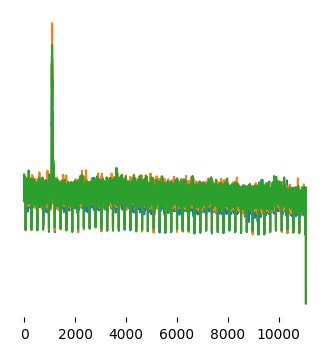

In [34]:
idx = [147, 422, 700]
plt.plot(f_cells[idx[0]])
plt.plot(f_cells[idx[1]])
plt.plot(f_cells[idx[2]])

from scipy.stats import pearsonr
corr, _ = pearsonr(f_cells[idx[0]], f_cells[idx[2]])
corr

#corr, _ = pearsonr(spks[0], spks[2])
#plt.plot(spks[0])
#plt.plot(spks[2])
#corr

**How correlated are the spikes though?**

Not that correlated

0.15472313185470288

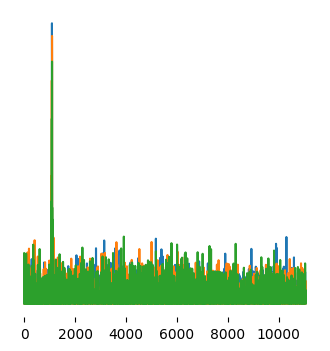

In [35]:
idx = [147, 422, 700]
plt.plot(spks[idx[0]])
plt.plot(spks[idx[1]])
plt.plot(spks[idx[2]])

from scipy.stats import pearsonr
corr, _ = pearsonr(spks[idx[0]], spks[idx[2]])
corr

What if we overlap the spatial images?

### Large-scale two-photon calcium imaging in freely moving mice
##### Zong et al., 2022; https://www.cell.com/action/showPdf?pii=S0092-8674%2822%2900197-0
**Remove repeated cells in multiplane imaging**
Three parameters were used to decide if cells from different planes were the same cells: the center distance (center of cell defined as
**the mean value of all pixel positions belonging to the cell as extracted from Suite2P**), **the overlap ratio** (described below in ‘‘Multi-FOV
stitching’’ section), and the **Pearson’s correlation** of the calcium signals (DF/F) between cells in adjacent planes. We manually
changed the thresholds for these three parameters with the ground truth decided by visual inspection of the shape of the cell,
and the signal correlation (an example in Figure S3Aviii). We decided on a threshold of 15 mm for center distance, 50% for overlap
ratio and 0.5 for signal correlation, optimized from samples on two cortical regions: MEC and V1, and applied then to all two-plane
data in this paper; this minimized the number of false negatives (repeated cells that were not identified), with an acceptable false positive rate (falsely identified repeated cells). If a cell was detected in multiple planes, only the one with the higher average DF/F value
was kept. All spatial tuning analyses were performed after repeated cells were removed. Software for removing repeated cells is
included in NATEX (see key resources table).

Overlap Ratio = min(R1&2/R1, R1&2/R2)
R1 = pixels belonging to cell 1, R2 = pixels belonging to cell 2, R1&2 = overlapping pixels belonging to cell 1 and 2. The higher of the two cells dF/F were kept.

But what if you take the max projection of repeated cells?


**What i need to do is separate the planes, clean the data, then determine if max projection over z-plane makes the most sense**

# Writing some code to identify cells in multiple planes

Z-step is 25um

In [8]:
output_path = r"C:\Users\spell\Desktop\John\cleanLines1_img\suite2p"
plane_dirs = [os.path.join(output_path,i) for i in os.listdir(output_path) if 'plane' in i]

# get results
stats_file = []; iscell = []; f_cells = []; f_neuropils = []; spks = []; ops = []
for i in plane_dirs:
    temp_ops = np.load(os.path.join(i,'ops.npy'), allow_pickle=True).item()
    temp_ops.keys() == temp_ops.keys()  
    ops.append(temp_ops)
    stats_file.append(np.load(os.path.join(i,'stat.npy'),allow_pickle=True))
    iscell.append(np.load(os.path.join(i,'iscell.npy'),allow_pickle=True)[:, 0].astype(bool))
    f_cells.append(np.load(os.path.join(i,'F.npy'),allow_pickle=True))
    f_neuropils.append(np.load(os.path.join(i,'Fneu.npy'),allow_pickle=True))
    spks.append(np.load(os.path.join(i,'spks.npy'),allow_pickle=True))

# get image masks
im = []
for i in range(len(stats_file)):
    temp = suite2p.ROI.stats_dicts_to_3d_array(stats_file[i], Ly=ops[i]['Ly'], Lx=ops[i]['Lx'], label_id=True)
    temp[temp == 0] = np.nan
    im.append(temp)

# get single matrix per plane
plane_mask = []
for i in range(len(im)):
    plane_mask.append(np.nanmax(im[i][iscell[i]], axis=0))

C:\Users\spell\AppData\Local\Temp\ipykernel_16000\1621585484.py:26: RuntimeWarning: All-NaN slice encountered
  plane_mask.append(np.nanmax(im[i][iscell[i]], axis=0))


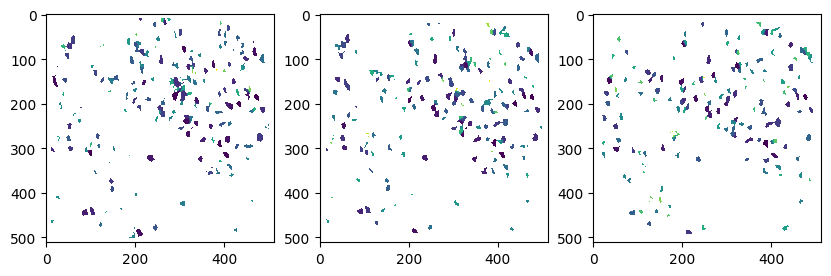

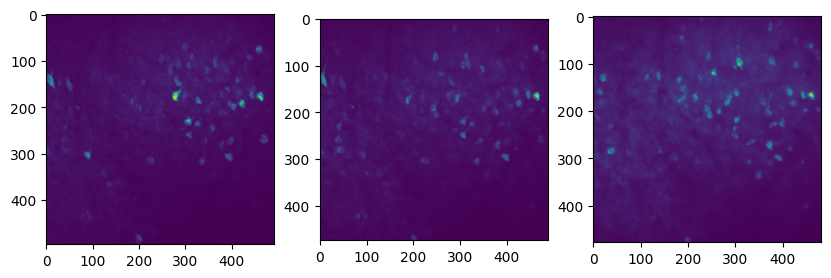

In [18]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(10,10))
for i in range(len(plane_mask)):
    ax[i].imshow(plane_mask[i])
fig2, ax2 = plt.subplots(nrows=1,ncols=3,figsize=(10,10))
for i in range(len(plane_mask)):
    ax2[i].imshow(ops[i]['max_proj'])


In [12]:
im[0][iscell[0]][0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [13]:
ops[0]

{'suite2p_version': '0.14.2',
 'look_one_level_down': False,
 'fast_disk': 'C:\\Users\\spell\\Desktop\\John\\cleanLines1_img',
 'delete_bin': False,
 'mesoscan': False,
 'bruker': False,
 'bruker_bidirectional': False,
 'h5py': [],
 'h5py_key': 'data',
 'nwb_file': '',
 'nwb_driver': '',
 'nwb_series': '',
 'save_path0': 'C:\\Users\\spell\\Desktop\\John\\cleanLines1_img',
 'save_folder': 'suite2p',
 'subfolders': [],
 'move_bin': False,
 'nplanes': 3,
 'nchannels': 1,
 'functional_chan': 1,
 'tau': 0.7,
 'fs': 30.043,
 'force_sktiff': False,
 'frames_include': -1,
 'multiplane_parallel': False,
 'ignore_flyback': [],
 'preclassify': 0.0,
 'save_mat': False,
 'save_NWB': False,
 'combined': True,
 'aspect': 1.0,
 'do_bidiphase': False,
 'bidiphase': 0,
 'bidi_corrected': False,
 'do_registration': True,
 'two_step_registration': False,
 'keep_movie_raw': False,
 'nimg_init': 300,
 'batch_size': 500,
 'maxregshift': 0.1,
 'align_by_chan': 1,
 'reg_tif': False,
 'reg_tif_chan2': False,
 '

In [20]:
ops[0]['Lx']

512

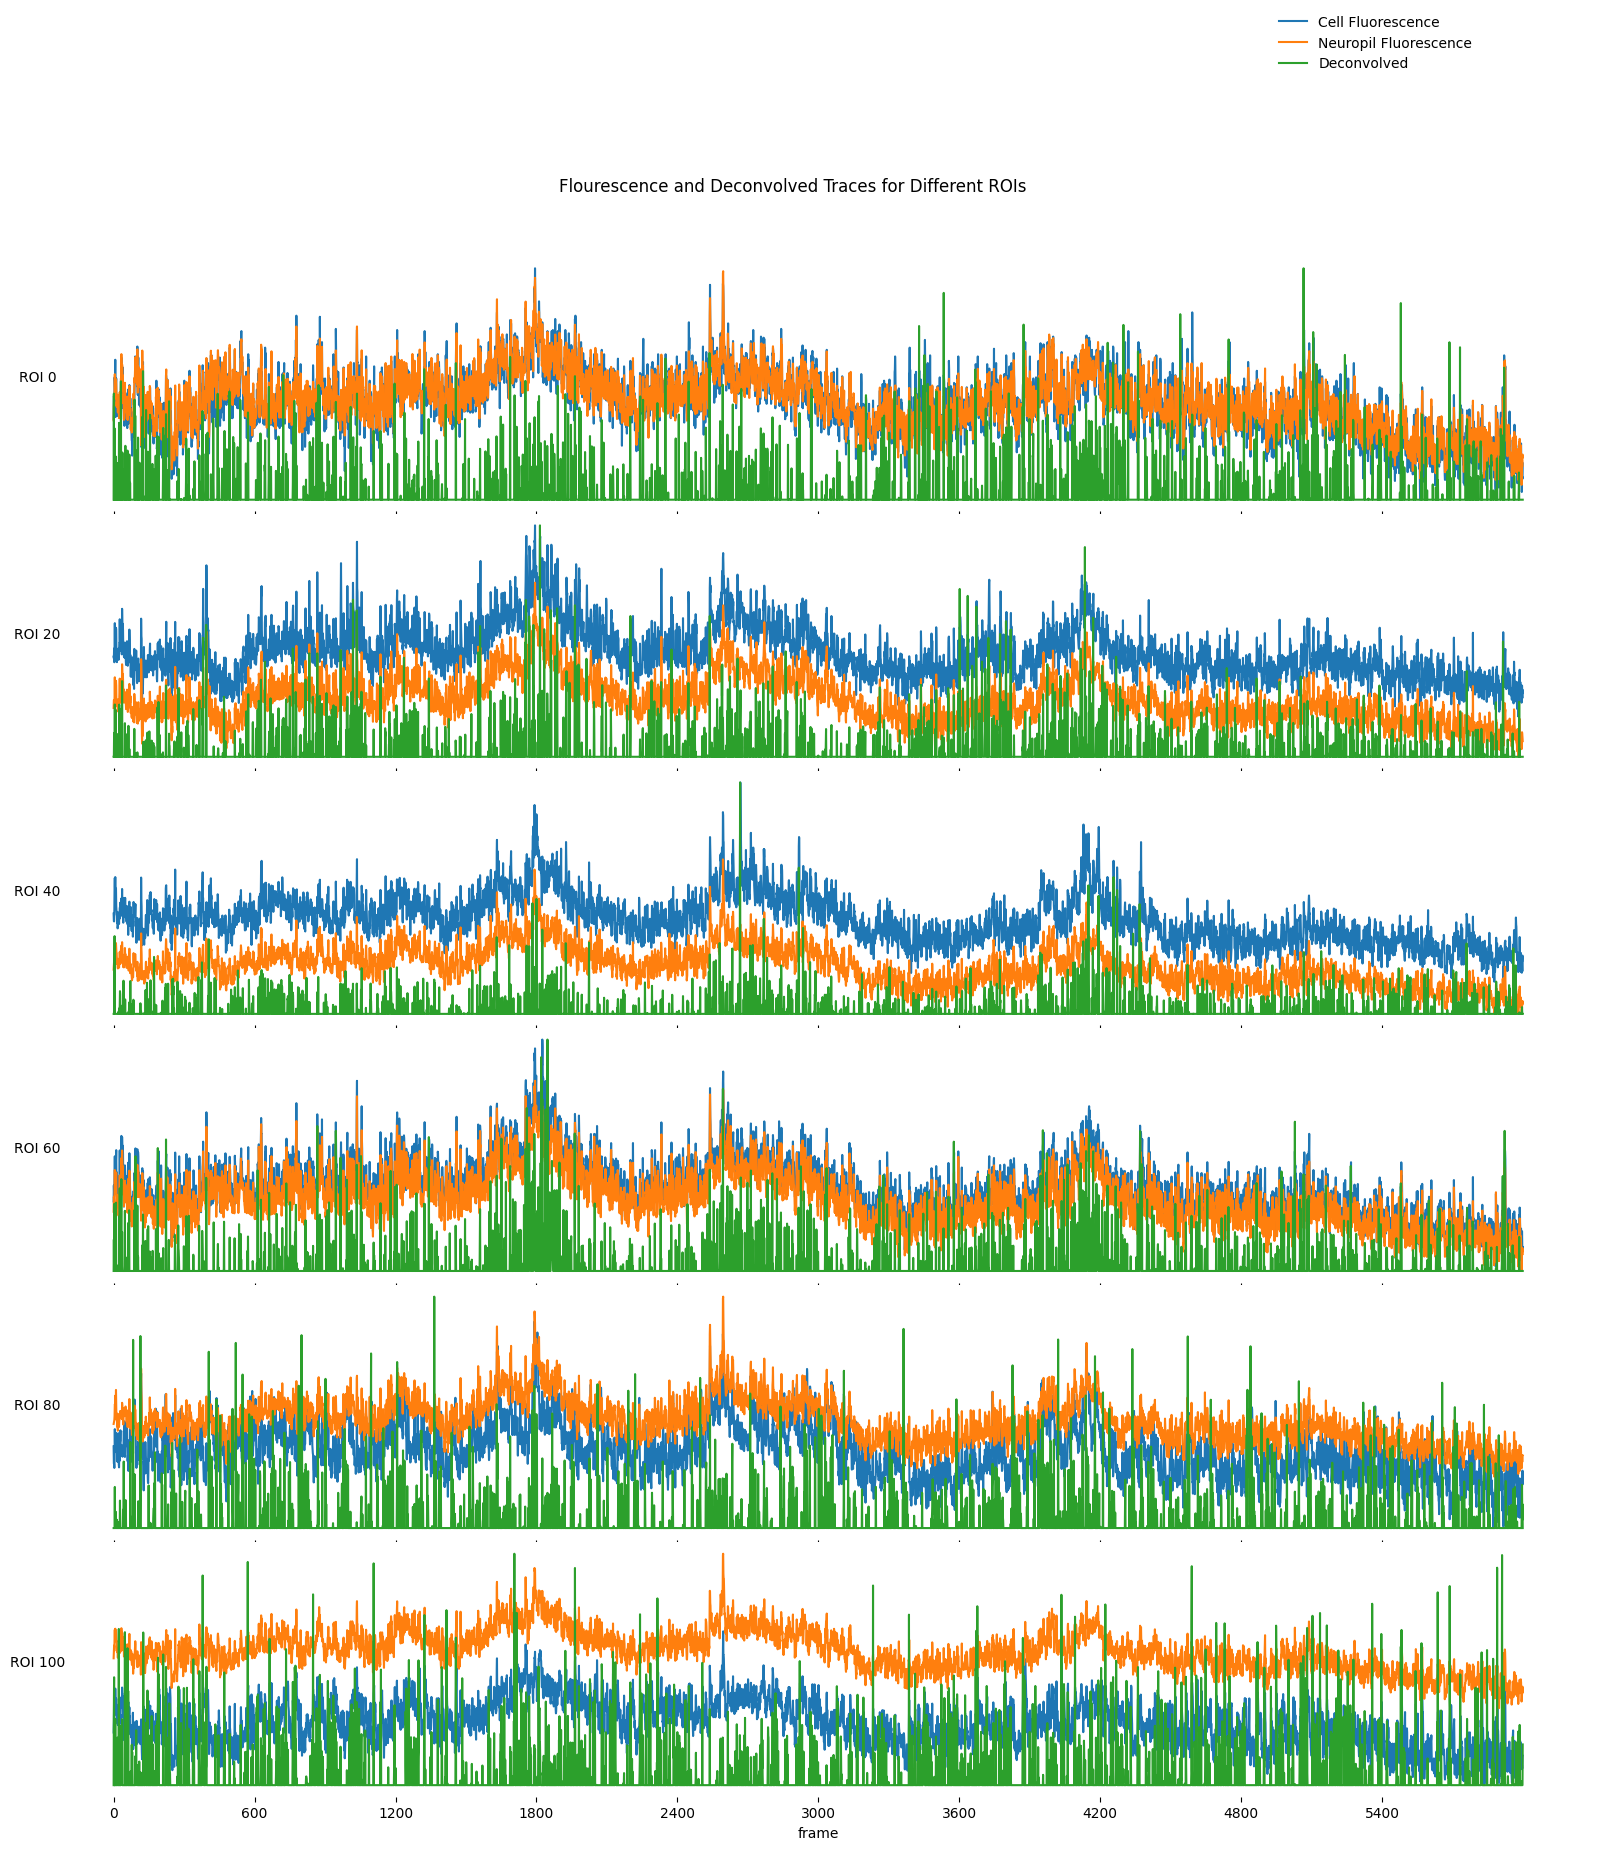

In [18]:
plt.figure(figsize=[20,20])
plt.suptitle("Flourescence and Deconvolved Traces for Different ROIs", y=0.92);
rois = np.arange(len(f_cells))[::20]
for i, roi in enumerate(rois):
    plt.subplot(len(rois), 1, i+1, )
    f = f_cells[roi]
    f_neu = f_neuropils[roi]
    sp = spks[roi]
    # Adjust spks range to match range of fluroescence traces
    fmax = np.maximum(f.max(), f_neu.max())
    fmin = np.minimum(f.min(), f_neu.min())
    frange = fmax - fmin 
    sp /= sp.max()
    sp *= frange
    plt.plot(f, label="Cell Fluorescence")
    plt.plot(f_neu, label="Neuropil Fluorescence")
    plt.plot(sp + fmin, label="Deconvolved")
    plt.xticks(np.arange(0, f_cells.shape[1], f_cells.shape[1]/10))
    plt.ylabel(f"ROI {roi}", rotation=0)
    plt.xlabel("frame")
    if i == 0:
        plt.legend(bbox_to_anchor=(0.93, 2))